<img src='https://drive.google.com/uc?Export=view&id=14xJDOqeXH8Wv6jYu3qRkYnxOyDYPish-'>

## Простая сеть:

соберем регрессию у(Х): 2 координаты Х = <x1,x2>
используем 2-х слойную сеть

## Импорт базовых модулей

In [10]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable

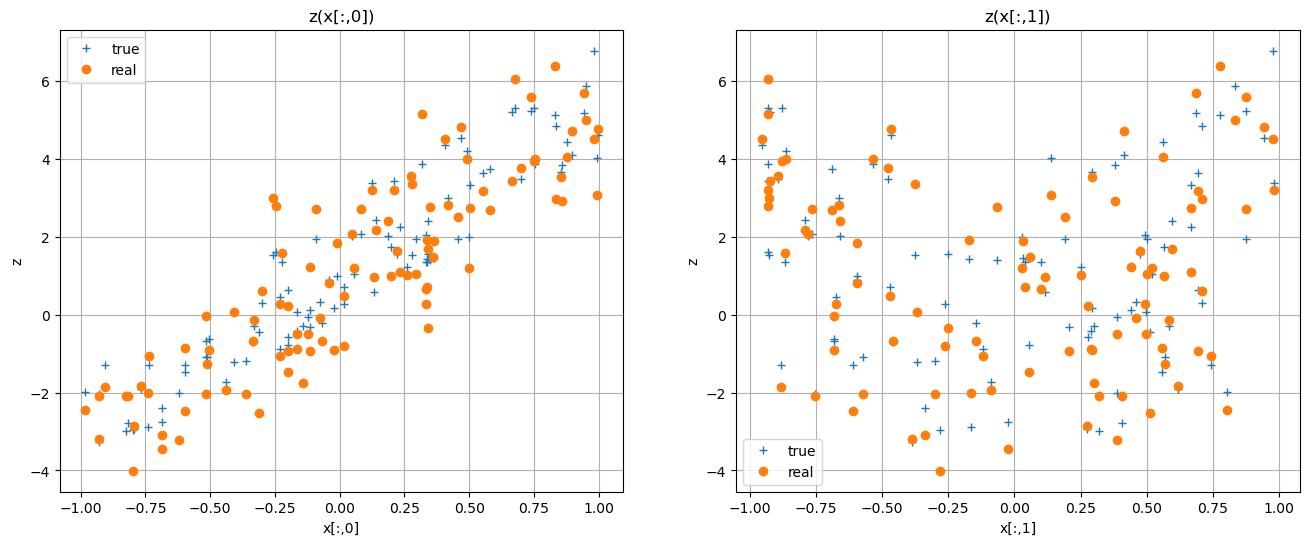

In [11]:
#  задаем входные переменные (признаки)
x = torch.rand(100,2) * 2 - 1 # входные признаки


# задаем функцию, которая нас интересует
def func_(x):
    return x[:,0] * 4 + x[:,1] ** 2 * 3 

z = func_(x) # идеальная регрессия

y = func_(x) + torch.randn((z.size())) # измеренная регрессия

# для проверки модели создадим еще данных
xt = torch.rand(50,2) * 2 - 1 # входные признаки
yt = func_(xt) + torch.randn((xt.shape[0])) # измеренная регрессия test

# нарисуем У(Х)
plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
plt.plot(x[:,0].numpy() , z ,'+',label = 'true')
plt.plot(x[:,0].numpy() , y, 'o' , label = 'real')
plt.legend()
plt.grid()
plt.xlabel('x[:,0]')
plt.ylabel('z')
plt.title('z(x[:,0])')

plt.subplot(1,2,2)
plt.plot(x[:,1].numpy() , z ,'+', label = 'true')
plt.plot(x[:,1].numpy() , y, 'o' , label = 'real')
plt.legend()
plt.grid()
plt.xlabel('x[:,1]')
plt.ylabel('z')
plt.title('z(x[:,1])')

plt.show()

Создаем класс для обработки информации из слоев (будет 2-х слойная нейронная сеть):

In [12]:
import torch.nn as nn
class Perceptron(nn.Module):
    def __init__(self, n = 3):
        # n - число нейронов скрытого слоя
        super().__init__()
        self.fc1 = nn.Linear(2, n) # первый слой
        self.fc2 = nn.Linear(n, 1) # второй слой
        #
        self.sigm = nn.Sigmoid() # активация скрытого слоя
    
    # собственно схема работы сети
    def forward(self, x):
        #print('input', x)
        xx = self.fc1(x)
        #print('output fc1', xx)
        xx = self.sigm(xx)
        xx = self.fc2(xx)
        output = xx# 
        #print('output', output)
        return output

Такие сети обучаются по **методу обратного распространения ошибки**, в котором сеть получает множества входных и выходных данных. Этот процесс называется обучением с учителем, и он отличается от обучения без учителя тем, что во втором случае множество выходных данных сеть составляет самостоятельно. Вышеупомянутая ошибка является разницей между вводом и выводом. Если у сети есть достаточное количество скрытых нейронов, она теоретически способна смоделировать взаимодействие между входным и выходными данными. Практически такие сети используются редко, но их часто комбинируют с другими типами для получения новых.

По сути - это последовательность матричных умножений

Создаем саму сеть и указываем число нейронов скрытого слоя:

In [13]:
perc = Perceptron(n = 3)
# нам нужен способ оценки промаха модели - функция потерь
criterion = torch.nn.MSELoss()
# нам нужен механизм для вычисления новых значений весов нейронов - оптимизатор
optimizer = torch.optim.SGD(perc.parameters(), lr=0.01)
# сюда будем записывать значения потерь по мере обучения
history = []
history_test = []
# начальный номер эпохи обучения
test_epoch = 0

perc

Perceptron(
  (fc1): Linear(in_features=2, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=1, bias=True)
  (sigm): Sigmoid()
)

## Цикл обучения:
  - разршить сери обучаться
  - очистить градиенты
  - сделать прямой проход
  - вычислить потери
  - совершить шаг обратного распространения
  - провести коррекцию параметров сети
  - записать значения потерь на наборе для обучения и теста (логирование)
  - проверить условие окончания работы сети

Epoch 0: train loss: 6.708136558532715
Epoch 40: train loss: 5.895071506500244
Epoch 80: train loss: 5.676053047180176
Epoch 120: train loss: 5.446738243103027
Epoch 160: train loss: 5.175405979156494
Epoch 200: train loss: 4.86647891998291
Epoch 240: train loss: 4.531065464019775
Epoch 280: train loss: 4.1832051277160645
Epoch 320: train loss: 3.837048053741455
Epoch 360: train loss: 3.5047338008880615


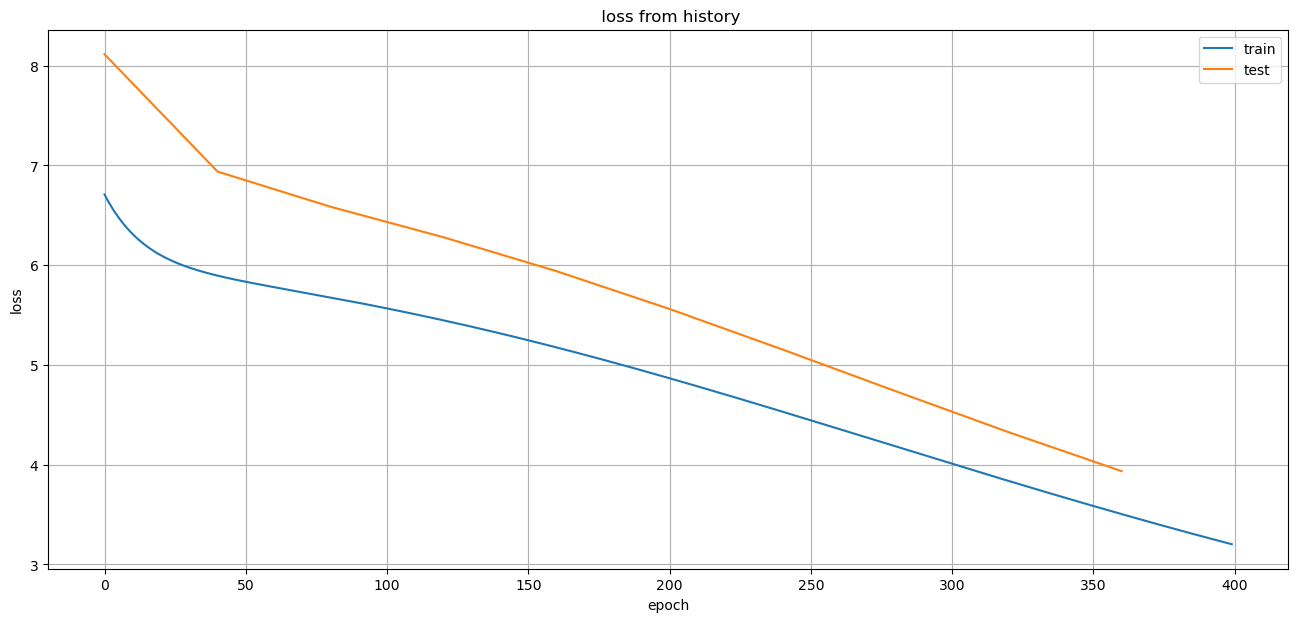

In [14]:
# разршить сети обучаться
perc.train()
epochs = 400

for epoch in range(epochs):
    # очистить градиенты
    optimizer.zero_grad()

    # сделать прямой проход
    y_pred = perc(x)

    # вычислить потери
    loss = criterion(y_pred.squeeze(), y)
   
    # совершить шаг обратного распространения
    loss.backward()

    # провести коррекцию параметров сети
    optimizer.step()

    # записать значения потерь на наборе для обучения и теста (логирование)
    history += [loss.item()]
    if epoch % 40 == 0:
        print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
        perc.eval()
        yp = perc(xt)
        loss_test = criterion(yp.squeeze(), yt)
        history_test += [[epoch+test_epoch,loss_test.item()]]
      
        perc.train()

test_epoch += epoch 
# визуализация результата
ht = np.array(history_test)
plt.figure(figsize = (16,7))
plt.plot(history,label = 'train')
plt.plot(ht[:,0],ht[:,1],label = 'test')
plt.title(' loss from history')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend() 
plt.show()       

In [15]:
# Так выглядит инференс нейронной сети по входным данным
perc.eval()
perc(torch.FloatTensor(xt[0,:]))

tensor([0.6251], grad_fn=<AddBackward0>)

Посмотрим на результат работы сети после обучения:

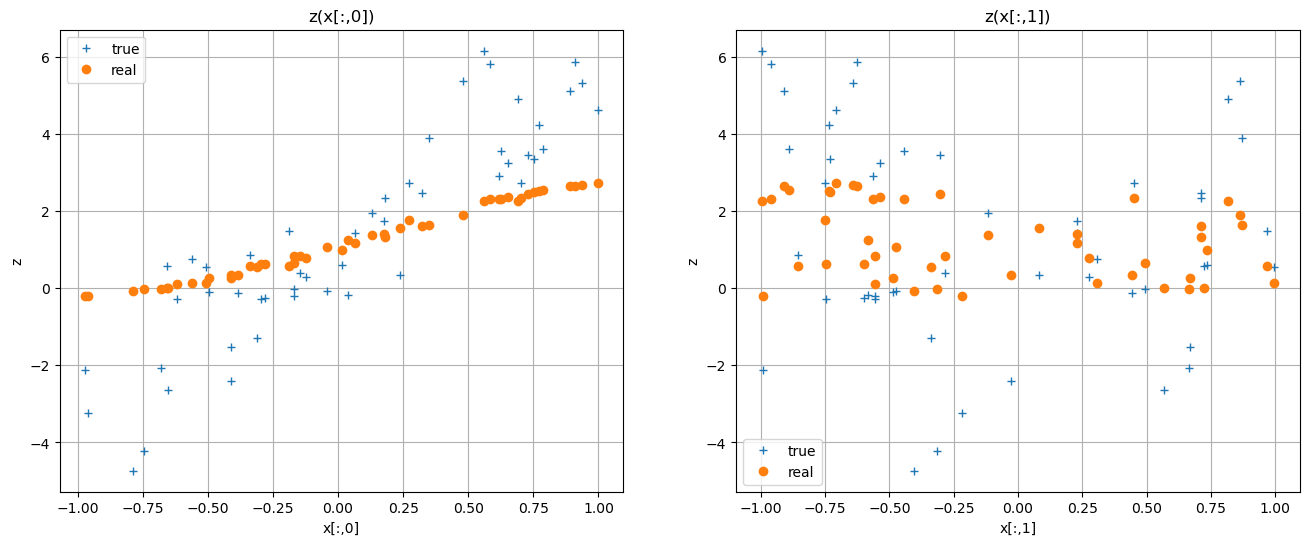

In [16]:
perc.eval()
ypt = perc(torch.FloatTensor(xt))
ypt = ypt.detach()

plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
plt.plot(xt[:,0].numpy() , yt ,'+',label = 'true')
plt.plot(xt[:,0].numpy() , ypt, 'o' , label = 'real')
plt.legend()
plt.grid()
plt.xlabel('x[:,0]')
plt.ylabel('z')
plt.title('z(x[:,0])')

plt.subplot(1,2,2)
plt.plot(xt[:,1].numpy() , yt ,'+', label = 'true')
plt.plot(xt[:,1].numpy() , ypt, 'o' , label = 'real')
plt.legend()
plt.grid()
plt.xlabel('x[:,1]')
plt.ylabel('z')
plt.title('z(x[:,1])')

plt.show()